<a href="https://colab.research.google.com/github/nischitabiradar/Orthodontic-growth-in-children-analyzed-using-Mixed-Effect-and-Random-Coefficient-Models./blob/main/Dental_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**APPENDIX**

In [ ]:
#Loading the Dataset
install.packages("readxl")
library(readxl)
dentaldata <- read_excel("Dental Dat.xlsx")
head(dentaldata)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Number,Patientid,ages,distances,sex
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,8,21.0,female
2,1,10,20.0,female
3,1,12,21.5,female
4,1,14,23.0,female
5,2,8,21.0,female
6,2,10,21.5,female


In [ ]:
#Data preparation: Ensuring No Missing Values
summary(dentaldata)
is.na(dentaldata)
complete.cases(dentaldata)

     Number         Patientid       ages        distances    
 Min.   :  1.00   Min.   : 1   Min.   : 8.0   Min.   :16.50  
 1st Qu.: 27.75   1st Qu.: 7   1st Qu.: 9.5   1st Qu.:22.00  
 Median : 54.50   Median :14   Median :11.0   Median :23.75  
 Mean   : 54.50   Mean   :14   Mean   :11.0   Mean   :24.02  
 3rd Qu.: 81.25   3rd Qu.:21   3rd Qu.:12.5   3rd Qu.:26.00  
 Max.   :108.00   Max.   :27   Max.   :14.0   Max.   :31.50  
     sex           
 Length:108        
 Class :character  
 Mode  :character  
                   
                   
                   

Number,Patientid,ages,distances,sex
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE


[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [61] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [76] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [91] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[106] TRUE TRUE TRUE

In [ ]:
#Exploratory Data Analysis and Summary Statistics
male <- subset(dentaldata, sex == "male")
female <- subset(dentaldata, sex == "female")
both <- dentaldata
summary(both$ages)
summary(both$distances)
table(both$sex)
table(both$Patientid)
sd(both$ages)
sd(both$distances)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    8.0     9.5    11.0    11.0    12.5    14.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.50   22.00   23.75   24.02   26.00   31.50 


female   male 
    44     64 


 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4 
27 
 4 

[1] 2.246493

[1] 2.928577

In [ ]:
#Installing ggplot2 for EDA
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



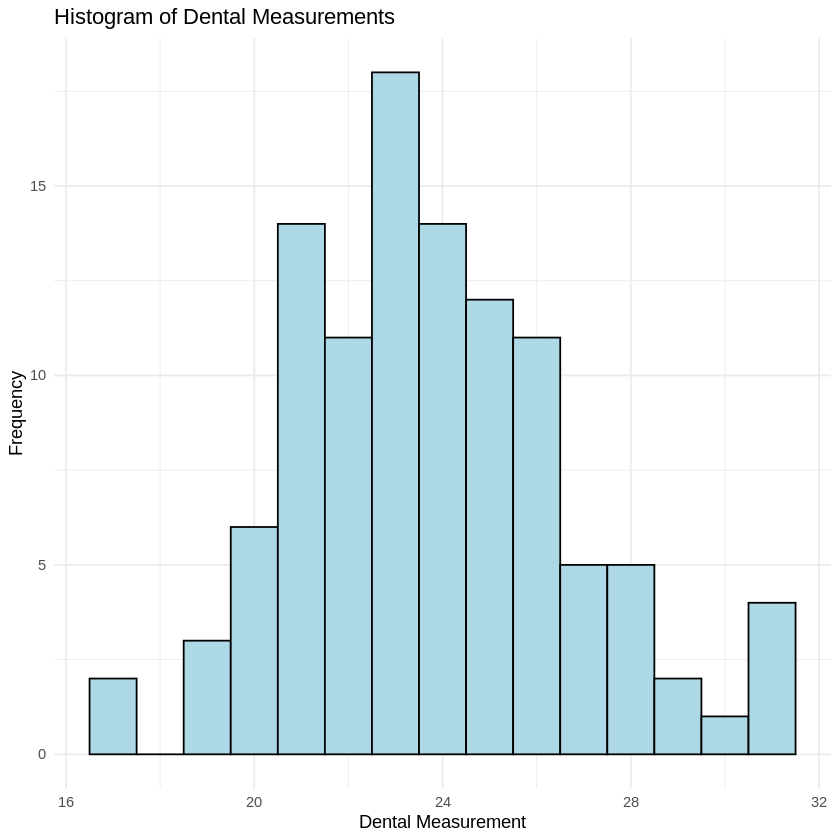

In [ ]:
#Histogram of response variable
ggplot(both, aes(x = distances)) +
  geom_histogram(binwidth = 1, color = "black", fill = "lightblue") +
  labs(title = "Histogram of Dental Measurements",
       x = "Dental Measurement",
       y = "Frequency") +
  theme_minimal()

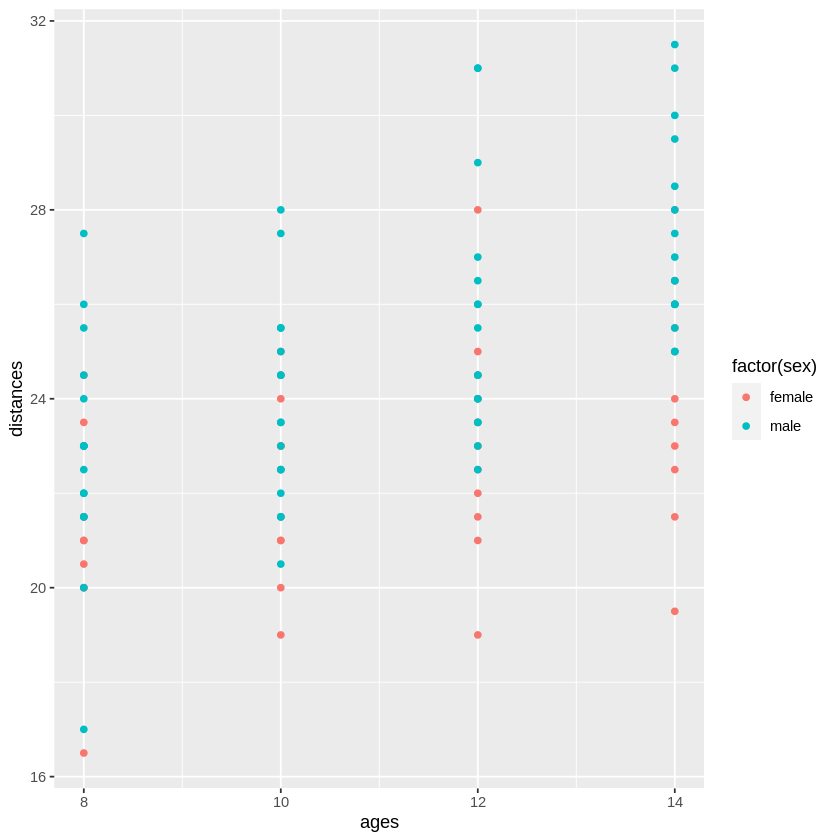

In [ ]:
# Examine the relationship between the response variable and predictor variables: Scatter Plot
ggplot(dentaldata, aes(x=ages, y=distances, color=factor(sex))) +
  geom_point()

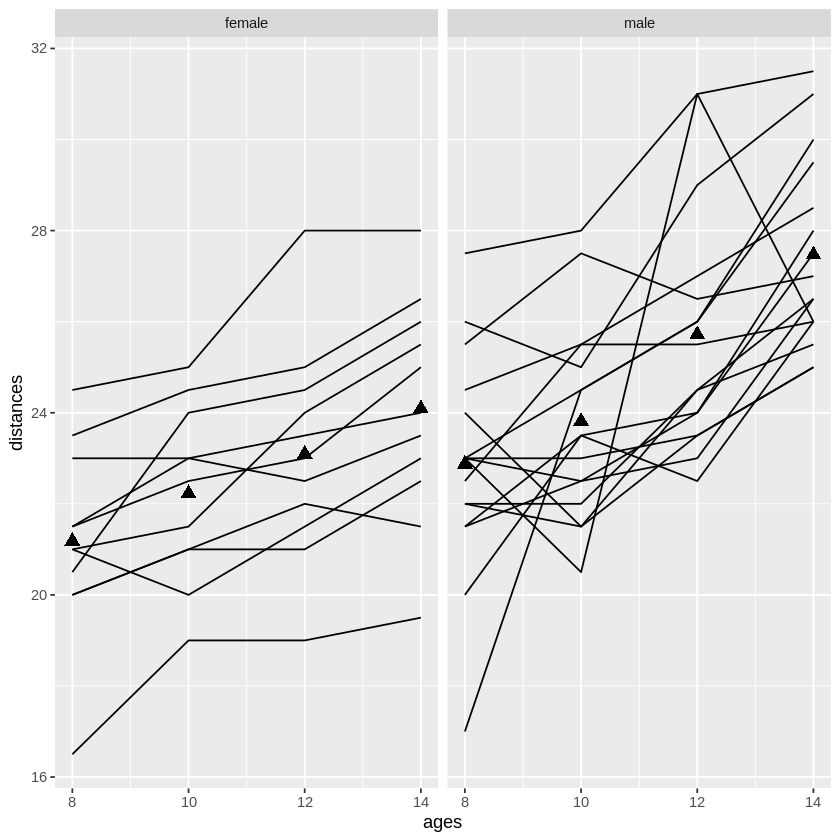

In [ ]:
p <- ggplot(data = dentaldata, aes(x = ages, y = distances, group = Patientid))
p + geom_line() + stat_summary(aes(group = 1), geom = "point", fun.y = mean,
    shape = 17, size = 3) + facet_grid(. ~ sex)

In [ ]:
#Installing packages for Model Selection
install.packages("lme4")   # For fitting linear mixed effect models
install.packages("nlme")   # For fitting random coefficient mixed models
library(lme4)
library(nlme)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



***Complete Dataset***

In [ ]:
#Setting up the data for analysis
both <- within(both, {
    Patientid <- factor(Patientid)
    sex <- factor(sex)
})
str(both)
head(both)

tibble [108 × 5] (S3: tbl_df/tbl/data.frame)
 $ Number   : num [1:108] 1 2 3 4 5 6 7 8 9 10 ...
 $ Patientid: Factor w/ 27 levels "1","2","3","4",..: 1 1 1 1 2 2 2 2 3 3 ...
 $ ages     : num [1:108] 8 10 12 14 8 10 12 14 8 10 ...
 $ distances: num [1:108] 21 20 21.5 23 21 21.5 24 25.5 20.5 24 ...
 $ sex      : Factor w/ 2 levels "female","male": 1 1 1 1 1 1 1 1 1 1 ...


Number,Patientid,ages,distances,sex
<dbl>,<fct>,<dbl>,<dbl>,<fct>
1,1,8,21.0,female
2,1,10,20.0,female
3,1,12,21.5,female
4,1,14,23.0,female
5,2,8,21.0,female
6,2,10,21.5,female


In [ ]:
# Linear mixed effect model with random intercepts
model1 <- lmer(distances ~ ages + sex + ages:sex + (1|Patientid), data=both, REML = FALSE)

# Check model summary
summarym1 <- summary(model1)
summarym1

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: distances ~ ages + sex + ages:sex + (1 | Patientid)
   Data: both

     AIC      BIC   logLik deviance df.resid 
   440.6    456.7   -214.3    428.6      102 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6468 -0.4634  0.0156  0.5217  3.7333 

Random effects:
 Groups    Name        Variance Std.Dev.
 Patientid (Intercept) 3.030    1.741   
 Residual              1.875    1.369   
Number of obs: 108, groups:  Patientid, 27

Fixed effects:
             Estimate Std. Error t value
(Intercept)  17.37273    1.16152  14.957
ages          0.47955    0.09231   5.195
sexmale      -1.03210    1.50886  -0.684
ages:sexmale  0.30483    0.11991   2.542

Correlation of Fixed Effects:
            (Intr) ages   sexmal
ages        -0.874              
sexmale     -0.770  0.673       
ages:sexmal  0.673 -0.770 -0.874

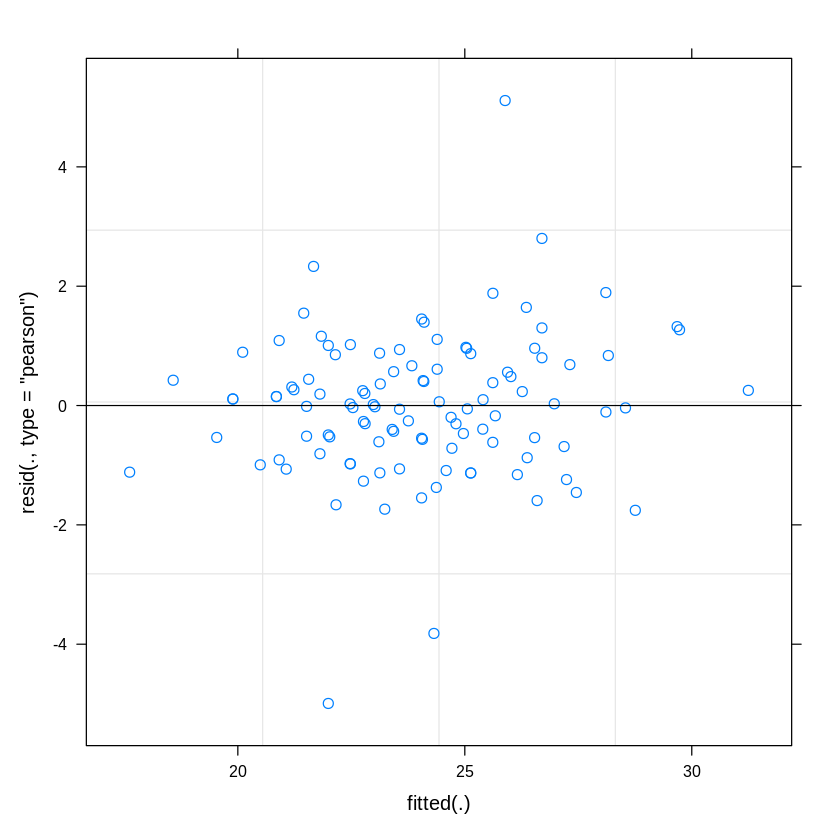

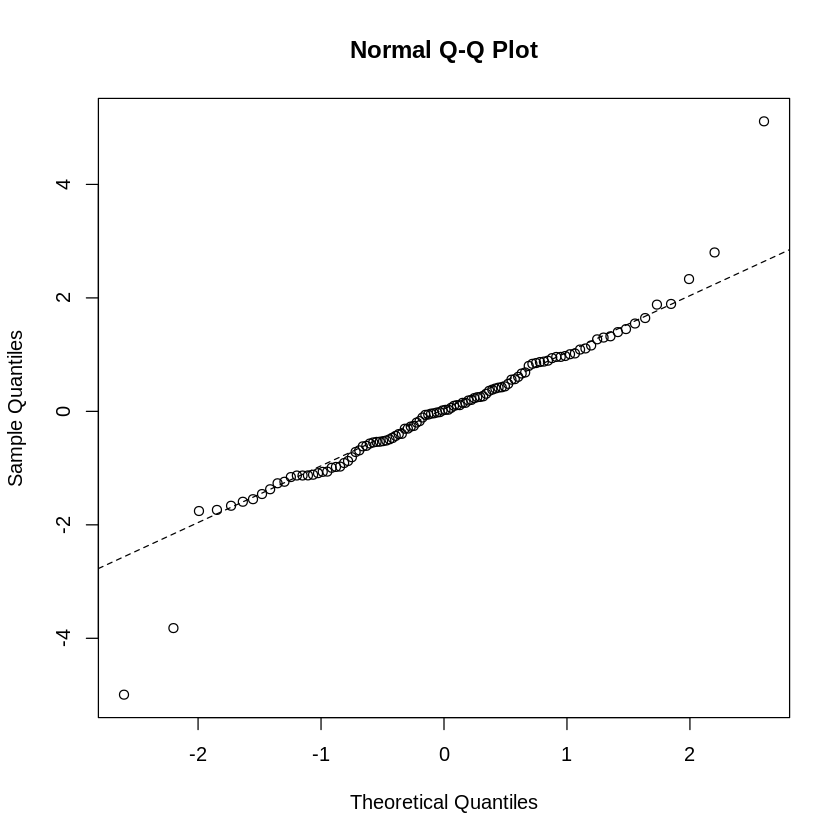

In [ ]:
#Model Diagnostics
plot(model1)
qqnorm(resid(model1))
qqline(resid(model1),lty=2)

In [ ]:
#Estimation of population mean models
# Fixed-effects coefficients
fixed_effects <- summarym1$coefficients
print(fixed_effects)

# Covariance of fixed-effects coefficients
fixed_effects_cov <- vcov(model1)
print(fixed_effects_cov)


               Estimate Std. Error    t value
(Intercept)  17.3727273 1.16152455 14.9568317
ages          0.4795455 0.09230932  5.1949844
sexmale      -1.0321023 1.50886465 -0.6840257
ages:sexmale  0.3048295 0.11991332  2.5420825
4 x 4 Matrix of class "dpoMatrix"
             (Intercept)        ages     sexmale ages:sexmale
(Intercept)   1.34913928 -0.09373111 -1.34913928   0.09373111
ages         -0.09373111  0.00852101  0.09373111  -0.00852101
sexmale      -1.34913928  0.09373111  2.27667254  -0.15817124
ages:sexmale  0.09373111 -0.00852101 -0.15817124   0.01437920


In [ ]:
#Estimation of individual trajectories
# Subject-specific random effects (BLUPs)
random_effects <- ranef(model1)

# Extract the random intercepts
random_intercepts <- random_effects$Patientid[, 1]

# Combine fixed and random effects to obtain subject-specific intercepts
subject_specific_intercepts <- fixed_effects[1, 1] + random_intercepts

# Subject-specific slopes (assuming constant slopes for all individuals)
subject_specific_slopes <- fixed_effects[2, 1]

# Combine the intercepts and slopes into a data frame
subject_specific_effects <- data.frame(Intercepts = subject_specific_intercepts, Slopes = subject_specific_slopes)
print(subject_specific_effects)


   Intercepts    Slopes
1    16.27047 0.4795455
2    17.67782 0.4795455
3    18.32736 0.4795455
4    19.30169 0.4795455
5    17.35304 0.4795455
6    16.05395 0.4795455
7    17.67782 0.4795455
8    18.00259 0.4795455
9    16.05395 0.4795455
10   13.78054 0.4795455
11   20.60078 0.4795455
12   19.78146 0.4795455
13   15.99244 0.4795455
14   16.75024 0.4795455
15   18.80714 0.4795455
16   15.66767 0.4795455
17   18.59063 0.4795455
18   16.31721 0.4795455
19   16.42547 0.4795455
20   17.50805 0.4795455
21   21.29707 0.4795455
22   16.20896 0.4795455
23   16.75024 0.4795455
24   16.75024 0.4795455
25   17.29153 0.4795455
26   18.15760 0.4795455
27   15.66767 0.4795455


In [ ]:
# Linear mixed effect model with random slopes
model2 <- lmer(distances ~ ages + sex + ages:sex + (1+ages|Patientid), data=both, REML = FALSE)

# Check model summary
summarym2 <- summary(model2)
summarym2

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: distances ~ ages + sex + ages:sex + (1 + ages | Patientid)
   Data: both

     AIC      BIC   logLik deviance df.resid 
   443.8    465.3   -213.9    427.8      100 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3359 -0.4154  0.0104  0.4917  3.8582 

Random effects:
 Groups    Name        Variance Std.Dev. Corr 
 Patientid (Intercept) 4.55781  2.1349        
           ages        0.02377  0.1542   -0.60
 Residual              1.71619  1.3100        
Number of obs: 108, groups:  Patientid, 27

Fixed effects:
             Estimate Std. Error t value
(Intercept)  17.37273    1.18205  14.697
ages          0.47955    0.09981   4.805
sexmale      -1.03210    1.53553  -0.672
ages:sexmale  0.30483    0.12965   2.351

Correlation of Fixed Effects:
            (Intr) ages   sexmal
ages        -0.880              
sexmale     -0.770  0.678       
ages:sexmal  0.678 -0.770 -0.880

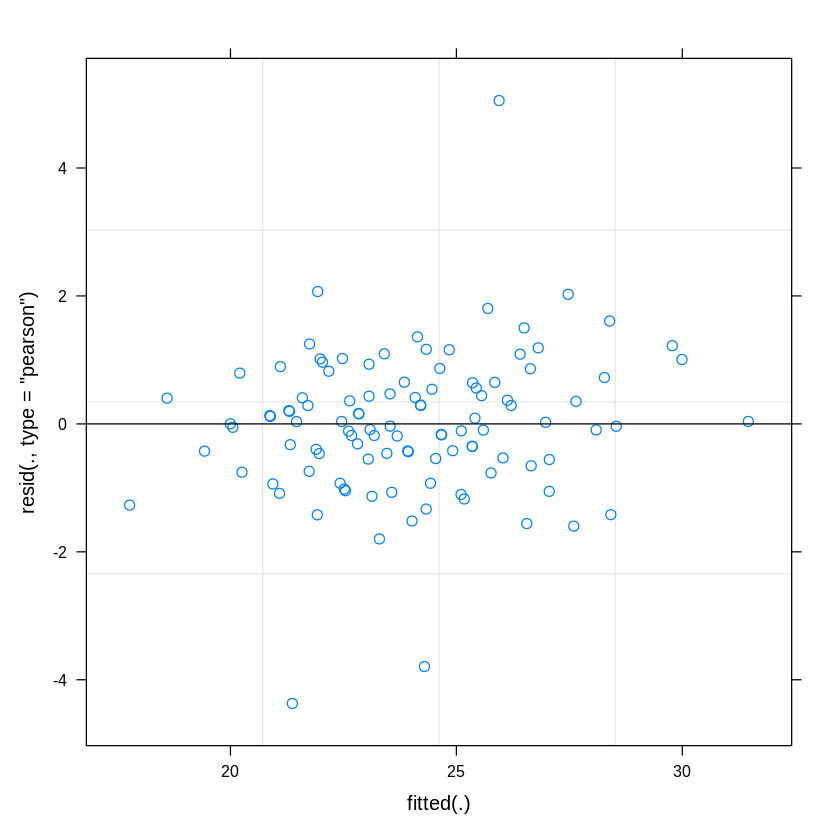

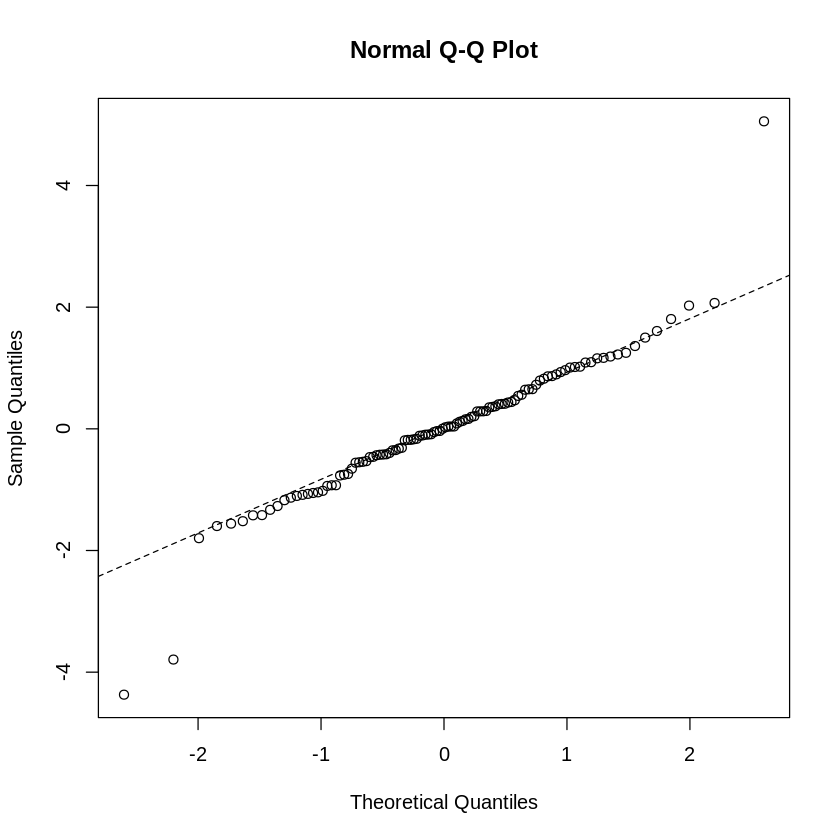

In [ ]:
#Model Diagnostics
plot(model2)
qqnorm(resid(model2))
qqline(resid(model2),lty=2)

In [ ]:
#Estimation of population mean models
# Fixed-effects coefficients
fixed_effects <- summarym2$coefficients
print(fixed_effects)

# Covariance of fixed-effects coefficients
fixed_effects_cov <- vcov(model2)
print(fixed_effects_cov)


               Estimate Std. Error    t value
(Intercept)  17.3727273 1.18205432 14.6970634
ages          0.4795455 0.09980708  4.8047239
sexmale      -1.0321023 1.53553361 -0.6721457
ages:sexmale  0.3048295 0.12965320  2.3511147
4 x 4 Matrix of class "dpoMatrix"
             (Intercept)         ages    sexmale ages:sexmale
(Intercept)    1.3972524 -0.103840541 -1.3972524  0.103840541
ages          -0.1038405  0.009961453  0.1038405 -0.009961453
sexmale       -1.3972524  0.103840541  2.3578635 -0.175230913
ages:sexmale   0.1038405 -0.009961453 -0.1752309  0.016809952


In [ ]:
#Estimation of individual trajectories
# Subject-specific random effects (BLUPs)
random_effects <- ranef(model2)

# Extract the random intercepts and slopes
random_intercepts <- random_effects$Patientid[, 1]
random_slopes <- random_effects$Patientid[, 2]

# Combine fixed and random effects to obtain subject-specific intercepts and slopes
subject_specific_intercepts <- fixed_effects[1, 1] + random_intercepts
subject_specific_slopes <- fixed_effects[2, 1] + random_slopes

# Combine the intercepts and slopes into a data frame
subject_specific_effects <- data.frame(Intercepts = subject_specific_intercepts, Slopes = subject_specific_slopes)
print(subject_specific_effects)

   Intercepts    Slopes
1    16.68997 0.4395696
2    16.91332 0.5514447
3    17.34147 0.5725798
4    18.98458 0.5103753
5    17.81133 0.4365362
6    16.51018 0.4360026
7    17.46936 0.4992742
8    18.57310 0.4263689
9    16.73260 0.4151344
10   14.45561 0.4142006
11   19.61847 0.5735136
12   19.00448 0.5537909
13   16.24743 0.4548496
14   16.93229 0.4621170
15   19.91917 0.3760110
16   15.81094 0.4651503
17   18.62730 0.4767850
18   16.46151 0.4654171
19   17.49667 0.3785108
20   17.06111 0.5215548
21   20.70783 0.5370233
22   17.42810 0.3645097
23   16.37625 0.5142875
24   14.26330 0.7125354
25   17.88220 0.4240809
26   17.26685 0.5635580
27   16.47819 0.4025457


In [ ]:
# A random coefficient mixed model with both random intercepts and slopes.
model3 <- lmer(distances ~ ages + sex + ages:sex + (ages||Patientid), data=both, REML = FALSE)

# Check model summary
summarym3 <- summary(model3)
summarym3

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: distances ~ ages + sex + ages:sex + ((1 | Patientid) + (0 + ages |  
    Patientid))
   Data: both

     AIC      BIC   logLik deviance df.resid 
   442.1    460.9   -214.1    428.1      101 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6743 -0.4558  0.0074  0.5293  3.7603 

Random effects:
 Groups      Name        Variance Std.Dev.
 Patientid   (Intercept) 2.249195 1.49973 
 Patientid.1 ages        0.006758 0.08221 
 Residual                1.824208 1.35063 
Number of obs: 108, groups:  Patientid, 27

Fixed effects:
             Estimate Std. Error t value
(Intercept)  17.37273    1.11770  15.543
ages          0.47955    0.09437   5.081
sexmale      -1.03210    1.45193  -0.711
ages:sexmale  0.30483    0.12259   2.487

Correlation of Fixed Effects:
            (Intr) ages   sexmal
ages        -0.865              
sexmale     -0.770  0.666       
ages:sexmal  0.666 -0.770 -0.865

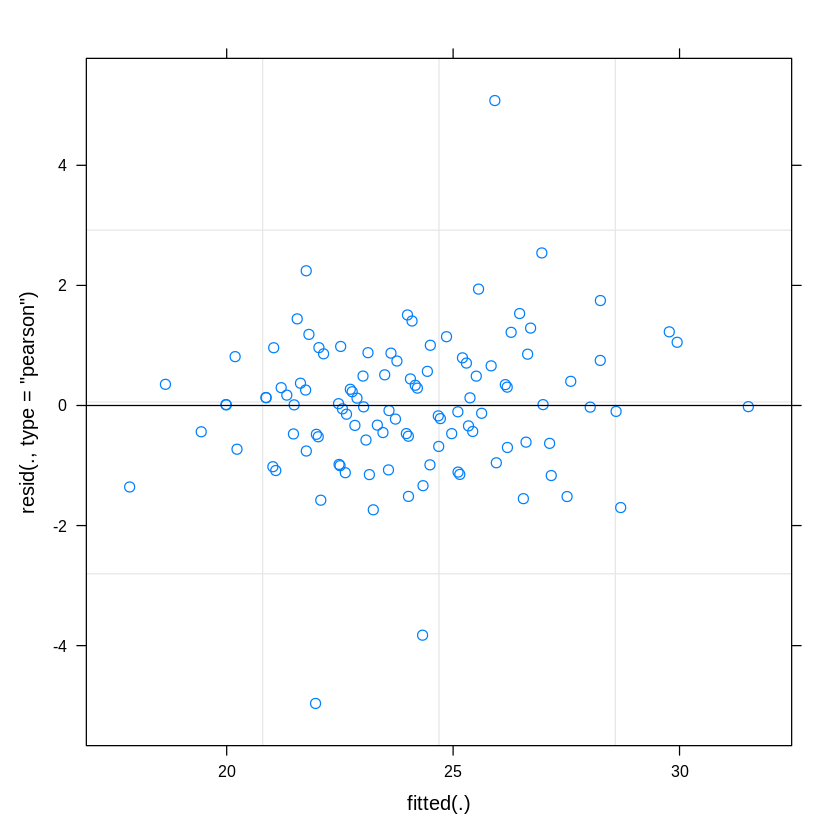

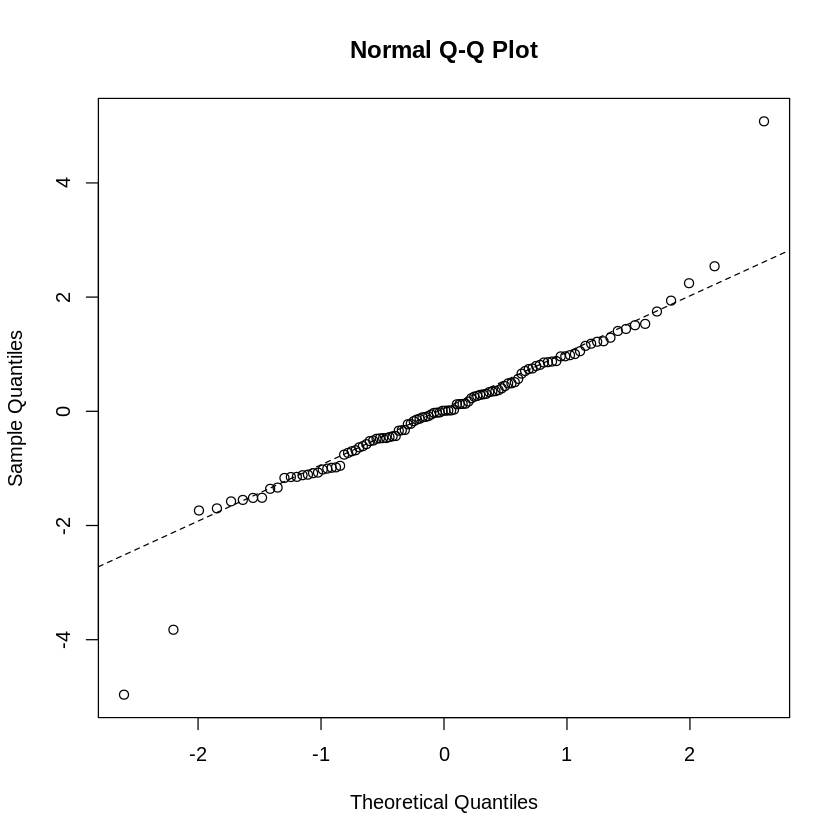

In [ ]:
#Model Diagnostics
plot(model3)
qqnorm(resid(model3))
qqline(resid(model3),lty=2)

In [ ]:
#Estimation of population mean models
# Fixed-effects coefficients
fixed_effects <- summarym3$coefficients
print(fixed_effects)

# Covariance of fixed-effects coefficients
fixed_effects_cov <- vcov(model3)
print(fixed_effects_cov)

               Estimate Std. Error    t value
(Intercept)  17.3727273 1.11769677 15.5433278
ages          0.4795455 0.09437273  5.0813986
sexmale      -1.0321023 1.45193069 -0.7108482
ages:sexmale  0.3048295 0.12259377  2.4865011
4 x 4 Matrix of class "dpoMatrix"
             (Intercept)         ages     sexmale ages:sexmale
(Intercept)   1.24924607 -0.091210408 -1.24924607  0.091210408
ages         -0.09121041  0.008906212  0.09121041 -0.008906212
sexmale      -1.24924607  0.091210408  2.10810274 -0.153917563
ages:sexmale  0.09121041 -0.008906212 -0.15391756  0.015029233


In [ ]:
#Estimation of individual trajectories
# Subject-specific random effects (BLUPs)
random_effects <- ranef(model3)

# Extract the random intercepts and slopes
random_intercepts <- random_effects$Patientid[, 1]
random_slopes <- random_effects$Patientid[, 2]

# Combine fixed and random effects to obtain subject-specific intercepts and slopes
subject_specific_intercepts <- fixed_effects[1, 1] + random_intercepts
subject_specific_slopes <- fixed_effects[2, 1] + random_slopes

# Combine the intercepts and slopes into a data frame
subject_specific_effects <- data.frame(Intercepts = subject_specific_intercepts, Slopes = subject_specific_slopes)
print(subject_specific_effects)

   Intercepts    Slopes
1    16.59842 0.4485077
2    17.44352 0.5038291
3    17.90553 0.5214944
4    18.82008 0.5237681
5    17.45868 0.4680807
6    16.43621 0.4435165
7    17.56661 0.4903712
8    17.99454 0.4776712
9    16.48544 0.4381333
10   14.69611 0.3951460
11   19.69486 0.5644817
12   19.09574 0.5439887
13   16.34327 0.4472217
14   16.92331 0.4633452
15   18.74736 0.4798087
16   16.06304 0.4437722
17   18.33899 0.5017333
18   16.57428 0.4560543
19   16.86462 0.4356715
20   17.38026 0.4929266
21   20.32965 0.5681610
22   16.72703 0.4279887
23   16.80022 0.4768031
24   16.33252 0.5279431
25   17.43960 0.4637112
26   17.79303 0.5159750
27   16.21073 0.4276228


***Male Dataset***

In [ ]:
male<- within(male, {
    Patientid <- factor(Patientid)
})
str(male)
head(male)

tibble [64 × 5] (S3: tbl_df/tbl/data.frame)
 $ Number   : num [1:64] 45 46 47 48 49 50 51 52 53 54 ...
 $ Patientid: Factor w/ 16 levels "12","13","14",..: 1 1 1 1 2 2 2 2 3 3 ...
 $ ages     : num [1:64] 8 10 12 14 8 10 12 14 8 10 ...
 $ distances: num [1:64] 26 25 29 31 21.5 22.5 23 26.5 23 22.5 ...
 $ sex      : chr [1:64] "male" "male" "male" "male" ...


Number,Patientid,ages,distances,sex
<dbl>,<fct>,<dbl>,<dbl>,<chr>
45,12,8,26.0,male
46,12,10,25.0,male
47,12,12,29.0,male
48,12,14,31.0,male
49,13,8,21.5,male
50,13,10,22.5,male


In [ ]:
#Linear mixed effect model with random intercepts
malemodel1 <- lmer(distances ~ ages + (1|Patientid), data=male, REML = FALSE)
malesummarym1<- summary(malemodel1)
malesummarym1

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: distances ~ ages + (1 | Patientid)
   Data: male

     AIC      BIC   logLik deviance df.resid 
   278.8    287.4   -135.4    270.8       60 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.04394 -0.65680  0.01161  0.53433  3.08613 

Random effects:
 Groups    Name        Variance Std.Dev.
 Patientid (Intercept) 2.446    1.564   
 Residual              2.758    1.661   
Number of obs: 64, groups:  Patientid, 16

Fixed effects:
            Estimate Std. Error t value
(Intercept) 16.34063    1.11299  14.682
ages         0.78437    0.09283   8.449

Correlation of Fixed Effects:
     (Intr)
ages -0.917

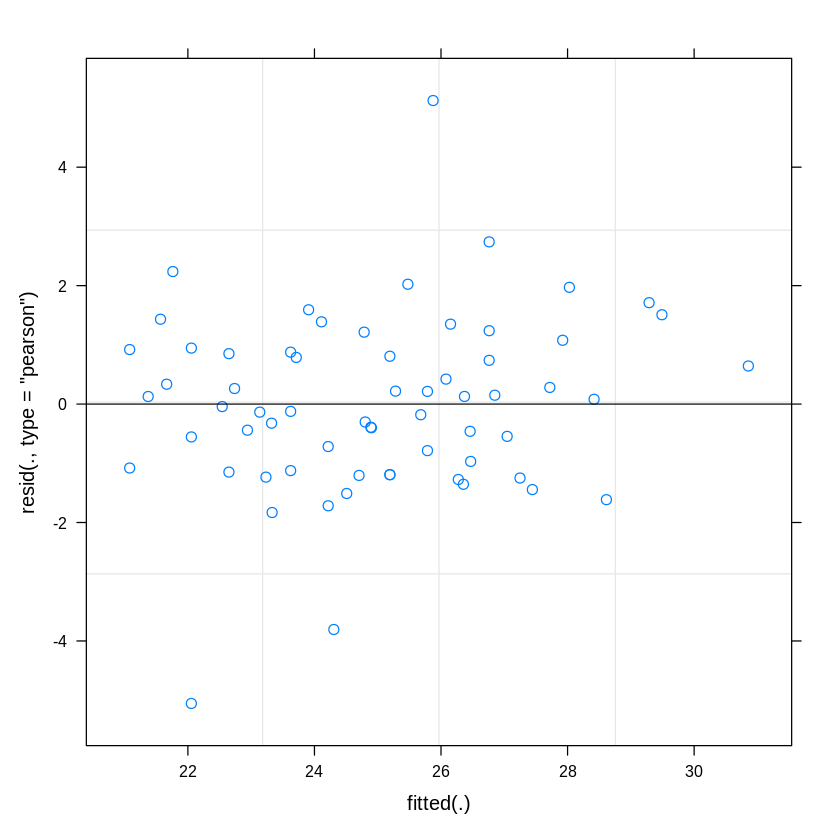

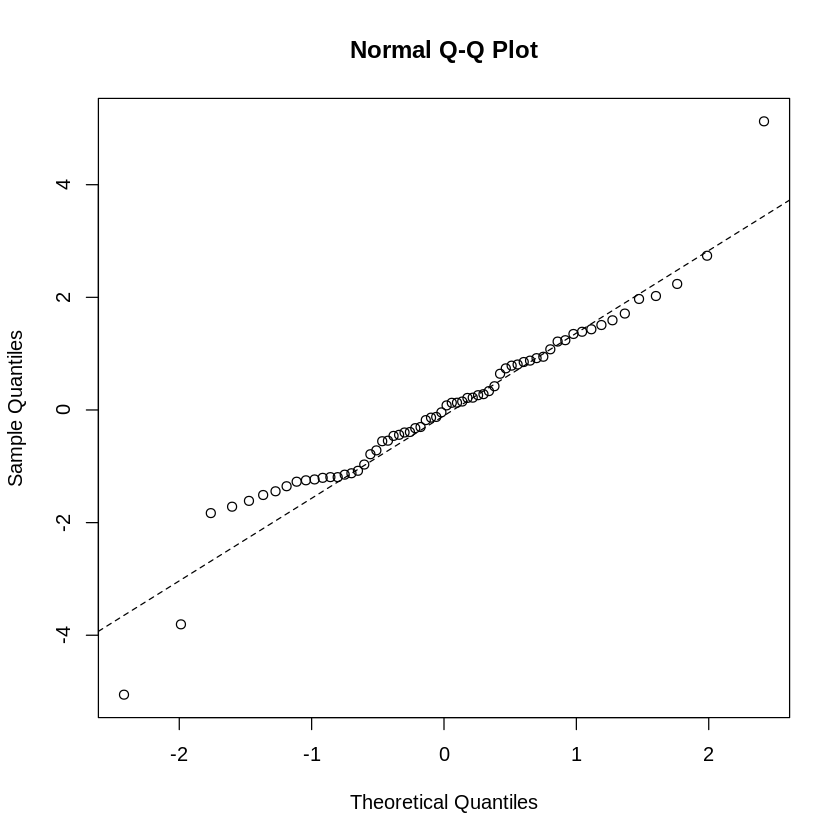

In [ ]:
#Model Diagnostics
plot(malemodel1)
qqnorm(resid(malemodel1))
qqline(resid(malemodel1),lty=2)

In [ ]:
#Estimation of population mean models
# Fixed-effects coefficients
fixed_effects <- malesummarym1$coefficients
print(fixed_effects)

# Covariance of fixed-effects coefficients
fixed_effects_cov <- vcov(malemodel1)
print(fixed_effects_cov)

             Estimate Std. Error   t value
(Intercept) 16.340625 1.11299466 14.681674
ages         0.784375 0.09283297  8.449315
2 x 2 Matrix of class "dpoMatrix"
            (Intercept)         ages
(Intercept)  1.23875712 -0.094797567
ages        -0.09479757  0.008617961


In [ ]:
#Estimation of individual trajectories
# Subject-specific random effects (BLUPs)
random_effects <- ranef(malemodel1)

# Extract the random intercepts
random_intercepts <- random_effects$Patientid[, 1]

# Combine fixed and random effects to obtain subject-specific intercepts
subject_specific_intercepts <- fixed_effects[1, 1] + random_intercepts

# Subject-specific slopes (assuming constant slopes for all individuals)
subject_specific_slopes <- fixed_effects[2, 1]

# Combine the intercepts and slopes into a data frame
subject_specific_effects <- data.frame(Intercepts = subject_specific_intercepts, Slopes = subject_specific_slopes)
print(subject_specific_effects)

   Intercepts   Slopes
1    18.51038 0.784375
2    15.09728 0.784375
3    15.77990 0.784375
4    17.63273 0.784375
5    14.80473 0.784375
6    17.43769 0.784375
7    15.38983 0.784375
8    15.48735 0.784375
9    16.46252 0.784375
10   19.87562 0.784375
11   15.29232 0.784375
12   15.77990 0.784375
13   15.77990 0.784375
14   16.26749 0.784375
15   17.04762 0.784375
16   14.80473 0.784375


In [ ]:
#Linear mixed effect model with random slopes
malemodel2 <- lmer(distances ~ ages + (1+ages|Patientid), data=male, REML = FALSE, control = lmerControl(optimizer = "bobyqa"))
malesummarym2 <- summary(malemodel2)
malesummarym2

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: distances ~ ages + (1 + ages | Patientid)
   Data: male
Control: lmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
   282.6    295.6   -135.3    270.6       58 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7745 -0.6338  0.0135  0.5616  3.1652 

Random effects:
 Groups    Name        Variance Std.Dev. Corr 
 Patientid (Intercept) 5.6468   2.3763        
           ages        0.0253   0.1591   -0.75
 Residual              2.5891   1.6091        
Number of obs: 64, groups:  Patientid, 16

Fixed effects:
            Estimate Std. Error t value
(Intercept) 16.34062    1.17148  13.949
ages         0.78438    0.09835   7.976

Correlation of Fixed Effects:
     (Intr)
ages -0.926

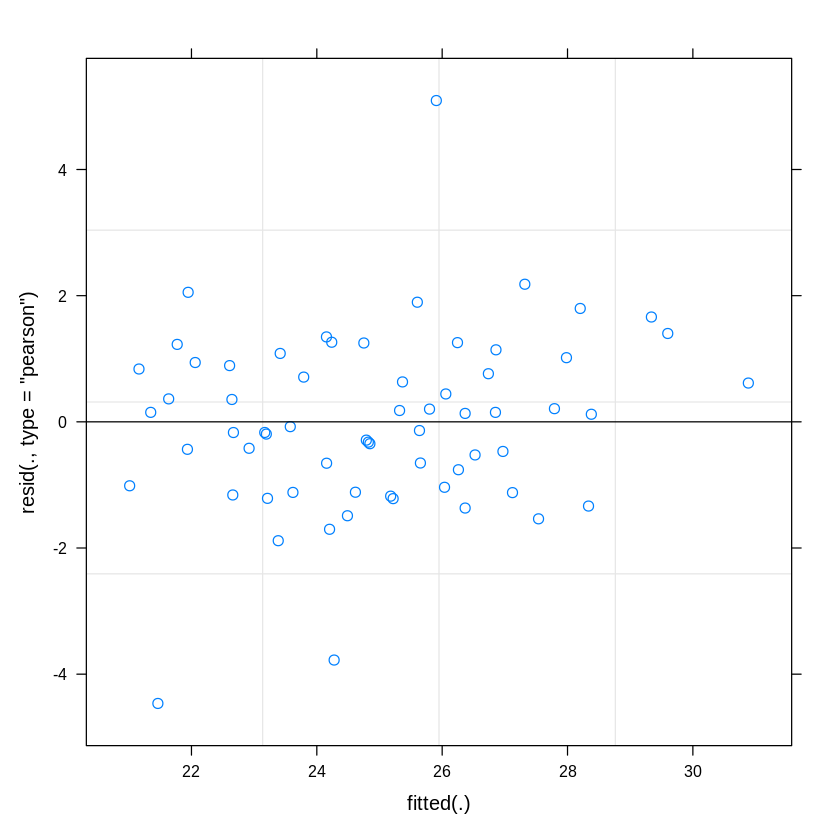

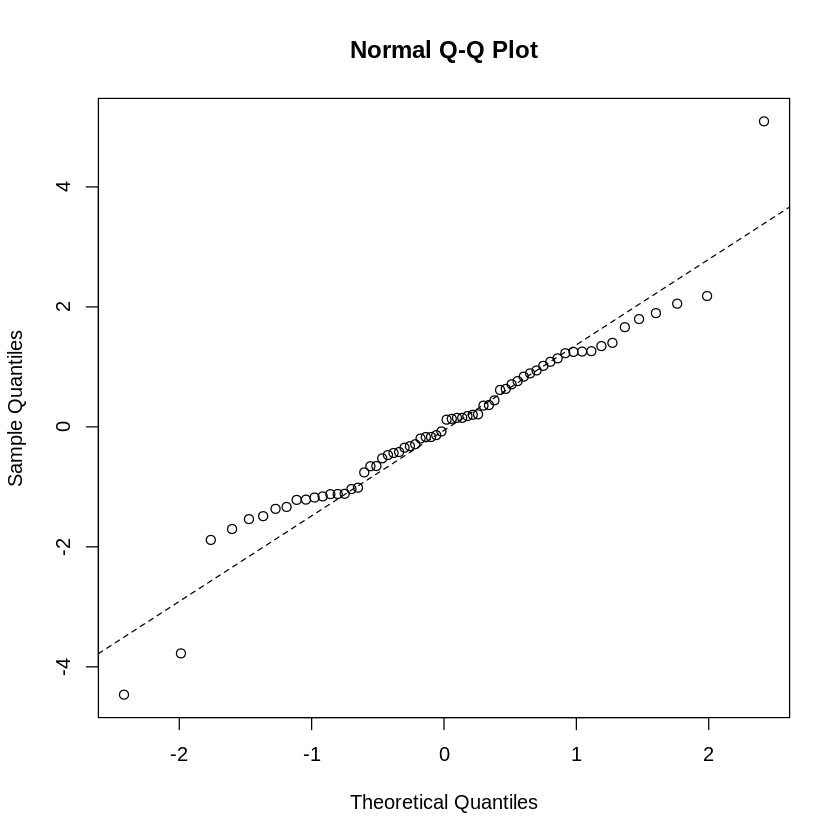

In [ ]:
#Model Diagnostics
plot(malemodel2)
qqnorm(resid(malemodel2))
qqline(resid(malemodel2),lty=2)

In [ ]:
#Estimation of population mean models
# Fixed-effects coefficients
fixed_effects <- malesummarym2$coefficients
print(fixed_effects)

# Covariance of fixed-effects coefficients
fixed_effects_cov <- vcov(malemodel2)
print(fixed_effects_cov)

             Estimate Std. Error   t value
(Intercept) 16.340625 1.17148108 13.948689
ages         0.784375 0.09834756  7.975541
2 x 2 Matrix of class "dpoMatrix"
            (Intercept)         ages
(Intercept)   1.3723679 -0.106669333
ages         -0.1066693  0.009672242


In [ ]:
#Estimation of individual trajectories
# Subject-specific random effects (BLUPs)
random_effects <- ranef(malemodel2)

# Extract the random intercepts
random_intercepts <- random_effects$Patientid[, 1]

# Combine fixed and random effects to obtain subject-specific intercepts
subject_specific_intercepts <- fixed_effects[1, 1] + random_intercepts

# Subject-specific slopes (assuming constant slopes for all individuals)
subject_specific_slopes <- fixed_effects[2, 1]

# Combine the intercepts and slopes into a data frame
subject_specific_effects <- data.frame(Intercepts = subject_specific_intercepts, Slopes = subject_specific_slopes)
print(subject_specific_effects)

   Intercepts   Slopes
1    18.28484 0.784375
2    15.07222 0.784375
3    15.82299 0.784375
4    18.77566 0.784375
5    14.63449 0.784375
6    17.67204 0.784375
7    15.32955 0.784375
8    16.19706 0.784375
9    16.12275 0.784375
10   20.05697 0.784375
11   16.08564 0.784375
12   15.37198 0.784375
13   13.65818 0.784375
14   16.73293 0.784375
15   16.45700 0.784375
16   15.17570 0.784375


In [ ]:
#A random coefficient mixed model with both random intercepts and slopes.
malemodel3 <- lmer(distances ~ ages + (ages||Patientid), data=male, REML = FALSE)
malesummarym3 <- summary(malemodel3)
malesummarym3

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: distances ~ ages + ((1 | Patientid) + (0 + ages | Patientid))
   Data: male

     AIC      BIC   logLik deviance df.resid 
   280.8    291.6   -135.4    270.8       59 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.04995 -0.66662  0.00757  0.52552  3.08713 

Random effects:
 Groups      Name        Variance Std.Dev.
 Patientid   (Intercept) 2.328298 1.52588 
 Patientid.1 ages        0.001012 0.03182 
 Residual                2.750205 1.65837 
Number of obs: 64, groups:  Patientid, 16

Fixed effects:
            Estimate Std. Error t value
(Intercept) 16.34063    1.10834   14.74
ages         0.78437    0.09305    8.43

Correlation of Fixed Effects:
     (Intr)
ages -0.917

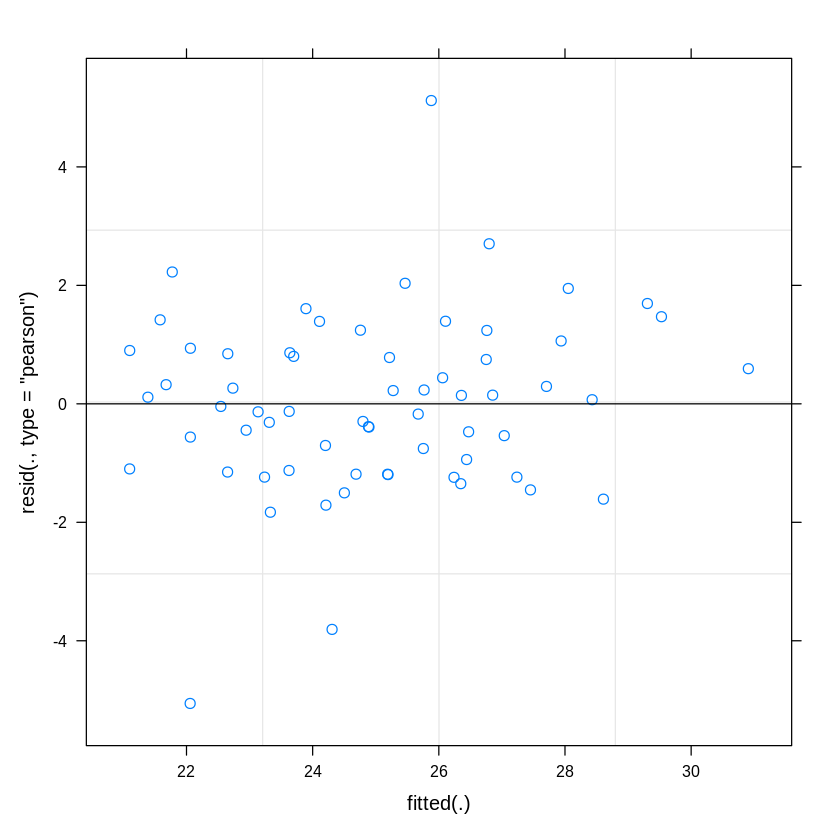

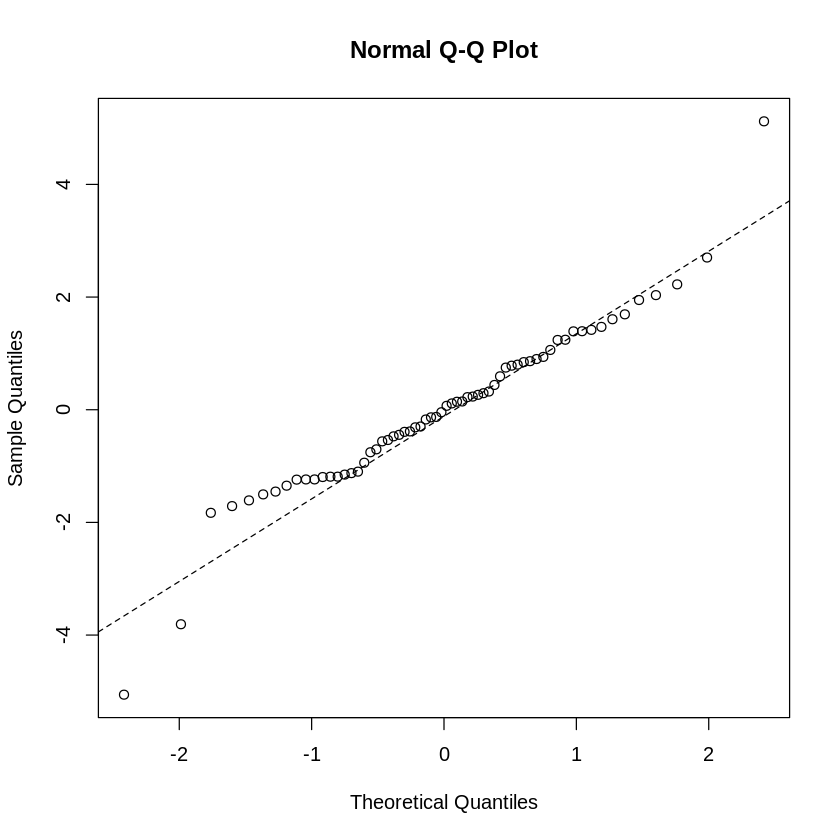

In [ ]:
#Model Diagnostics
plot(malemodel3)
qqnorm(resid(malemodel3))
qqline(resid(malemodel3),lty=2)

In [ ]:
#Estimation of population mean models
# Fixed-effects coefficients
fixed_effects <- malesummarym3$coefficients
print(fixed_effects)

# Covariance of fixed-effects coefficients
fixed_effects_cov <- vcov(malemodel3)
print(fixed_effects_cov)

             Estimate Std. Error   t value
(Intercept) 16.340625 1.10833748 14.743366
ages         0.784375 0.09304659  8.429917
2 x 2 Matrix of class "dpoMatrix"
            (Intercept)         ages
(Intercept)  1.22841198 -0.094538310
ages        -0.09453831  0.008657667


In [ ]:
#Estimation of individual trajectories
# Subject-specific random effects (BLUPs)
random_effects <- ranef(malemodel3)

# Extract the random intercepts
random_intercepts <- random_effects$Patientid[, 1]

# Combine fixed and random effects to obtain subject-specific intercepts
subject_specific_intercepts <- fixed_effects[1, 1] + random_intercepts

# Subject-specific slopes (assuming constant slopes for all individuals)
subject_specific_slopes <- fixed_effects[2, 1]

# Combine the intercepts and slopes into a data frame
subject_specific_effects <- data.frame(Intercepts = subject_specific_intercepts, Slopes = subject_specific_slopes)
print(subject_specific_effects)

   Intercepts   Slopes
1    18.39470 0.784375
2    15.15847 0.784375
3    15.80929 0.784375
4    17.60608 0.784375
5    14.87571 0.784375
6    17.39073 0.784375
7    15.43526 0.784375
8    15.55338 0.784375
9    16.44520 0.784375
10   19.70531 0.784375
11   15.37084 0.784375
12   15.79438 0.784375
13   15.73770 0.784375
14   16.28653 0.784375
15   16.99283 0.784375
16   14.89360 0.784375


***Female Dataset***

In [ ]:
female<- within(female, {
    Patientid <- factor(Patientid)
})
str(female)
head(female)

tibble [44 × 5] (S3: tbl_df/tbl/data.frame)
 $ Number   : num [1:44] 1 2 3 4 5 6 7 8 9 10 ...
 $ Patientid: Factor w/ 11 levels "1","2","3","4",..: 1 1 1 1 2 2 2 2 3 3 ...
 $ ages     : num [1:44] 8 10 12 14 8 10 12 14 8 10 ...
 $ distances: num [1:44] 21 20 21.5 23 21 21.5 24 25.5 20.5 24 ...
 $ sex      : chr [1:44] "female" "female" "female" "female" ...


Number,Patientid,ages,distances,sex
<dbl>,<fct>,<dbl>,<dbl>,<chr>
1,1,8,21.0,female
2,1,10,20.0,female
3,1,12,21.5,female
4,1,14,23.0,female
5,2,8,21.0,female
6,2,10,21.5,female


In [ ]:
#Linear mixed effect model with random intercepts
femalemodel1 <- lmer(distances ~ ages + (1|Patientid), data=female, REML = FALSE)
femalesummarym1 <-summary(femalemodel1)
femalesummarym1

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: distances ~ ages + (1 | Patientid)
   Data: female

     AIC      BIC   logLik deviance df.resid 
   146.0    153.2    -69.0    138.0       40 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.3056 -0.7192  0.1764  0.4258  1.6689 

Random effects:
 Groups    Name        Variance Std.Dev.
 Patientid (Intercept) 3.88     1.9699  
 Residual              0.59     0.7681  
Number of obs: 44, groups:  Patientid, 11

Fixed effects:
            Estimate Std. Error t value
(Intercept) 17.37273    0.83107   20.90
ages         0.47955    0.05179    9.26

Correlation of Fixed Effects:
     (Intr)
ages -0.685

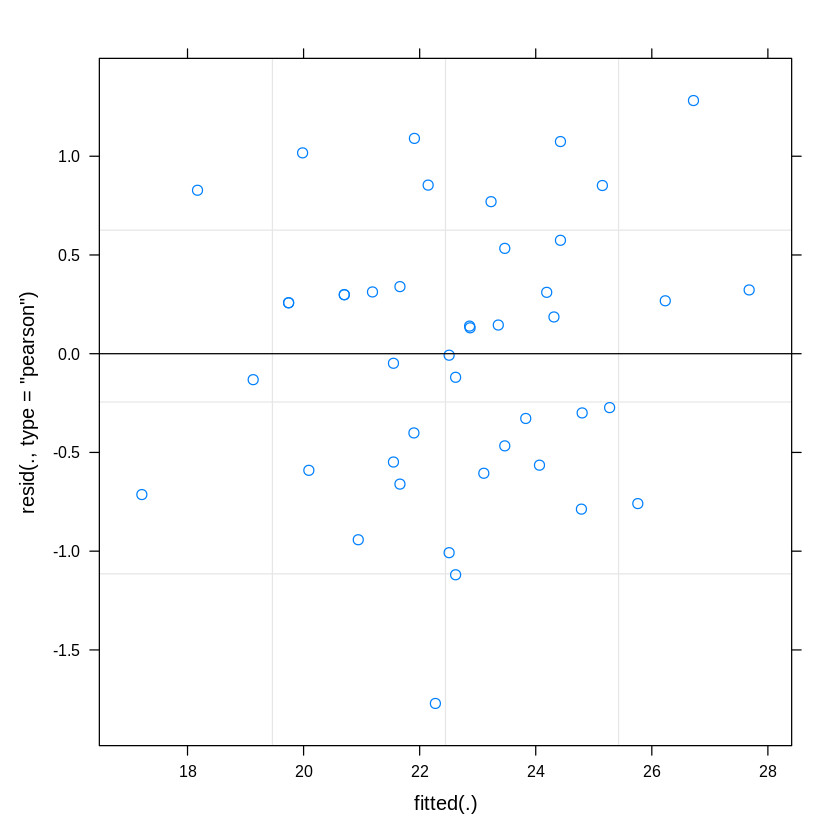

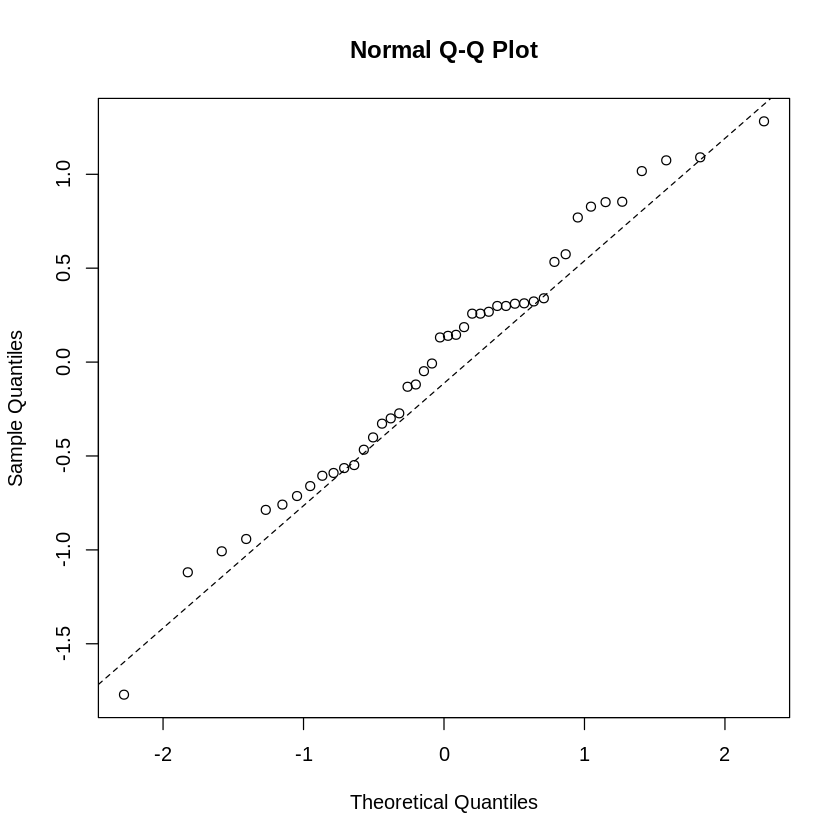

In [ ]:
#Model Diagnostics
plot(femalemodel1)
qqnorm(resid(femalemodel1))
qqline(resid(femalemodel1),lty=2)

In [ ]:
#Estimation of population mean models
# Fixed-effects coefficients
fixed_effects <- femalesummarym1$coefficients
print(fixed_effects)

# Covariance of fixed-effects coefficients
fixed_effects_cov <- vcov(femalemodel1)
print(fixed_effects_cov)

              Estimate Std. Error  t value
(Intercept) 17.3727273 0.83107137 20.90401
ages         0.4795455 0.05178688  9.25998
2 x 2 Matrix of class "dpoMatrix"
            (Intercept)         ages
(Intercept)  0.69067963 -0.029500689
ages        -0.02950069  0.002681881


In [ ]:
#Estimation of individual trajectories
# Subject-specific random effects (BLUPs)
random_effects <- ranef(femalemodel1)

# Extract the random intercepts
random_intercepts <- random_effects$Patientid[, 1]

# Combine fixed and random effects to obtain subject-specific intercepts
subject_specific_intercepts <- fixed_effects[1, 1] + random_intercepts

# Subject-specific slopes (assuming constant slopes for all individuals)
subject_specific_slopes <- fixed_effects[2, 1]

# Combine the intercepts and slopes into a data frame
subject_specific_effects <- data.frame(Intercepts = subject_specific_intercepts, Slopes = subject_specific_slopes)
print(subject_specific_effects)

   Intercepts    Slopes
1    16.14661 0.4795455
2    17.71210 0.4795455
3    18.43463 0.4795455
4    19.51844 0.4795455
5    17.35083 0.4795455
6    15.90576 0.4795455
7    17.71210 0.4795455
8    18.07337 0.4795455
9    15.90576 0.4795455
10   13.37689 0.4795455
11   20.96351 0.4795455


In [ ]:
#Linear mixed effect model with random slopes
femalemodel2 <- lmer(distances ~ ages + (1+ages|Patientid), data=female, REML = FALSE)
femalesummarym2 <- summary(femalemodel2)
femalesummarym2

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: distances ~ ages + (1 + ages | Patientid)
   Data: female

     AIC      BIC   logLik deviance df.resid 
   146.5    157.2    -67.3    134.5       38 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.93510 -0.47348  0.08335  0.45967  1.60921 

Random effects:
 Groups    Name        Variance Std.Dev. Corr 
 Patientid (Intercept) 2.97142  1.7238        
           ages        0.02151  0.1467   -0.30
 Residual              0.44659  0.6683        
Number of obs: 44, groups:  Patientid, 11

Fixed effects:
            Estimate Std. Error t value
(Intercept) 17.37273    0.72519  23.956
ages         0.47955    0.06313   7.596

Correlation of Fixed Effects:
     (Intr)
ages -0.637

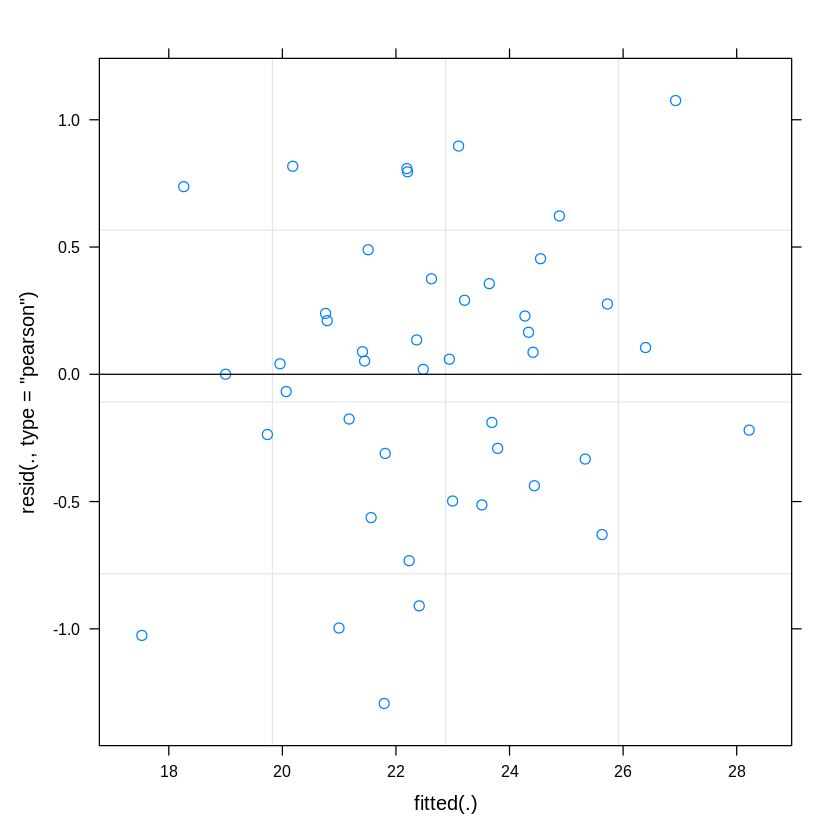

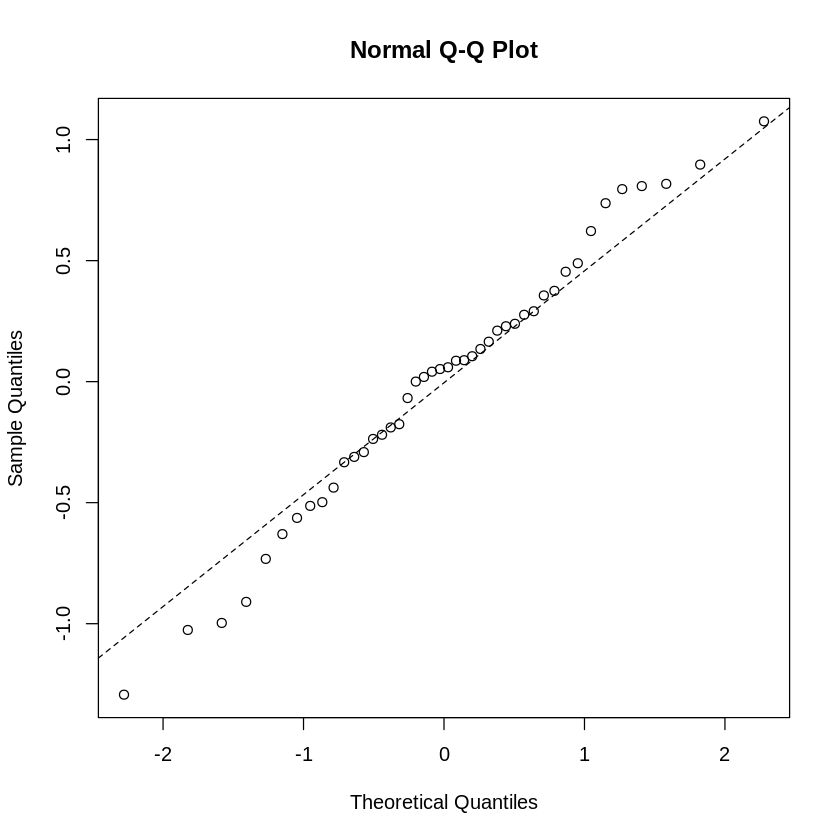

In [ ]:
#Model Diagnostics
plot(femalemodel2)
qqnorm(resid(femalemodel2))
qqline(resid(femalemodel2),lty=2)

In [ ]:
#Estimation of population mean models
# Fixed-effects coefficients
fixed_effects <- femalesummarym2$coefficients
print(fixed_effects)

# Covariance of fixed-effects coefficients
fixed_effects_cov <- vcov(femalemodel2)
print(fixed_effects_cov)

              Estimate Std. Error   t value
(Intercept) 17.3727273 0.72519330 23.955995
ages         0.4795455 0.06313237  7.595873
2 x 2 Matrix of class "dpoMatrix"
            (Intercept)         ages
(Intercept)  0.52590533 -0.029181687
ages        -0.02918169  0.003985696


In [ ]:
#Estimation of individual trajectories
# Subject-specific random effects (BLUPs)
random_effects <- ranef(femalemodel2)

# Extract the random intercepts
random_intercepts <- random_effects$Patientid[, 1]

# Combine fixed and random effects to obtain subject-specific intercepts
subject_specific_intercepts <- fixed_effects[1, 1] + random_intercepts

# Subject-specific slopes (assuming constant slopes for all individuals)
subject_specific_slopes <- fixed_effects[2, 1]

# Combine the intercepts and slopes into a data frame
subject_specific_effects <- data.frame(Intercepts = subject_specific_intercepts, Slopes = subject_specific_slopes)
print(subject_specific_effects)

   Intercepts    Slopes
1    16.92679 0.4795455
2    16.23961 0.4795455
3    16.55242 0.4795455
4    18.96131 0.4795455
5    18.23838 0.4795455
6    16.75068 0.4795455
7    17.31720 0.4795455
8    19.19775 0.4795455
9    17.18172 0.4795455
10   14.57824 0.4795455
11   19.15590 0.4795455


In [ ]:
#A random coefficient mixed model with both random intercepts and slopes.
femalemodel3 <- lmer(distances ~ ages + (ages||Patientid), data=female, REML = FALSE)
femalesummarym3 <-summary(femalemodel3)
femalesummarym3

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: distances ~ ages + ((1 | Patientid) + (0 + ages | Patientid))
   Data: female

     AIC      BIC   logLik deviance df.resid 
   144.7    153.6    -67.3    134.7       39 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.08315 -0.50739  0.08991  0.52914  1.56923 

Random effects:
 Groups      Name        Variance Std.Dev.
 Patientid   (Intercept) 2.19885  1.4829  
 Patientid.1 ages        0.01559  0.1249  
 Residual                0.47402  0.6885  
Number of obs: 44, groups:  Patientid, 11

Fixed effects:
            Estimate Std. Error t value
(Intercept) 17.37273    0.68657  25.304
ages         0.47955    0.05977   8.023

Correlation of Fixed Effects:
     (Intr)
ages -0.578

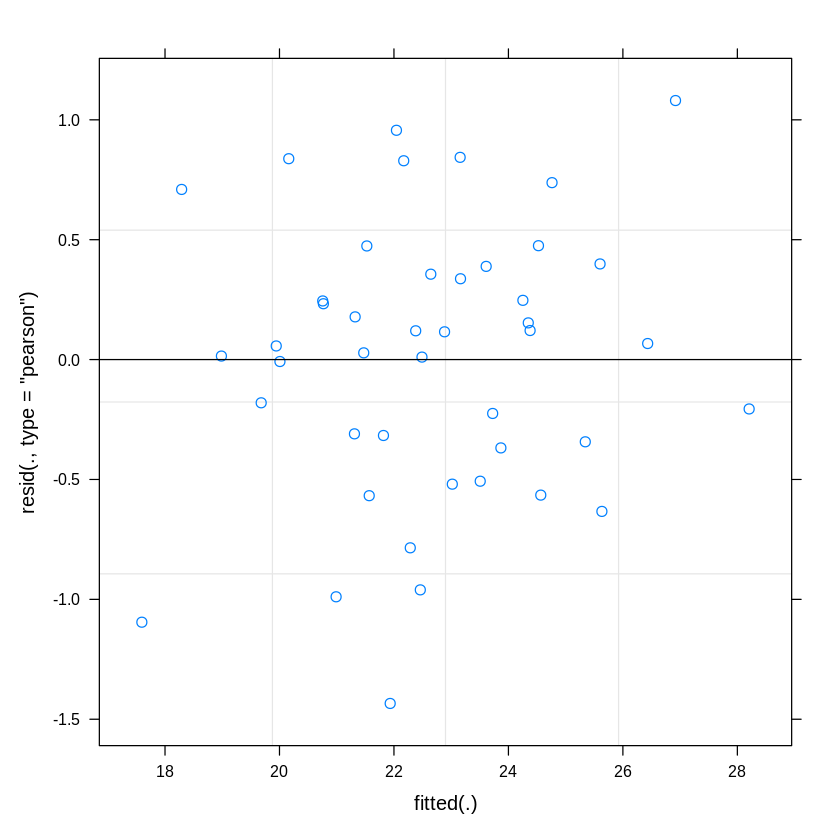

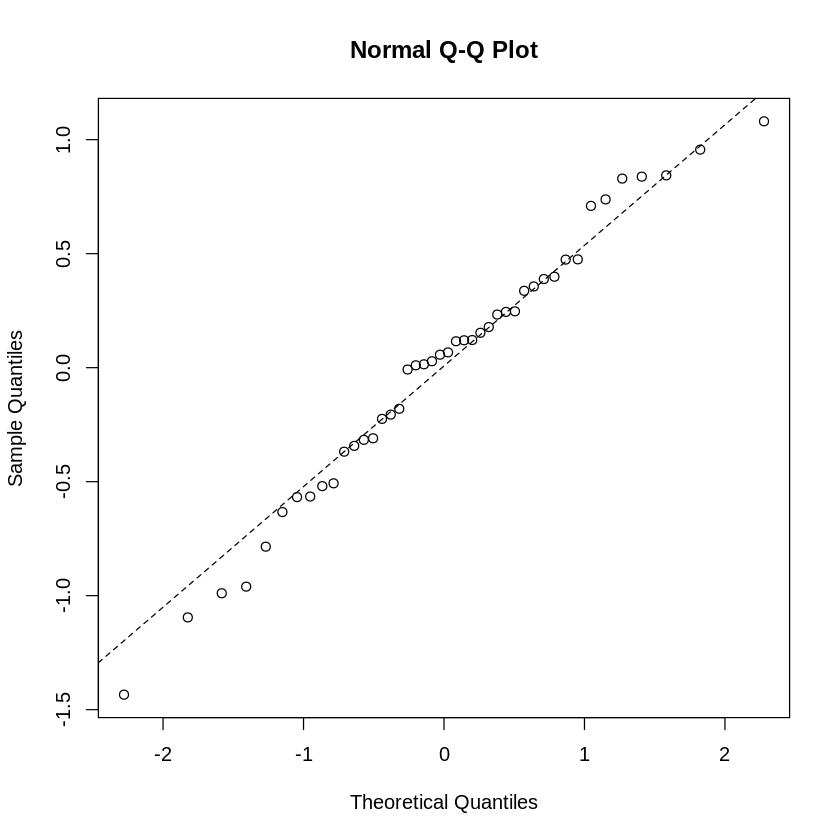

In [ ]:
#Model Diagnostics
plot(femalemodel3)
qqnorm(resid(femalemodel3))
qqline(resid(femalemodel3),lty=2)

In [ ]:
#Estimation of population mean models
# Fixed-effects coefficients
fixed_effects <- femalesummarym3$coefficients
print(fixed_effects)

# Covariance of fixed-effects coefficients
fixed_effects_cov <- vcov(femalemodel3)
print(fixed_effects_cov)

              Estimate Std. Error   t value
(Intercept) 17.3727273 0.68656945 25.303671
ages         0.4795455 0.05976909  8.023303
2 x 2 Matrix of class "dpoMatrix"
            (Intercept)         ages
(Intercept)  0.47137761 -0.023700837
ages        -0.02370084  0.003572344


In [ ]:
#Estimation of individual trajectories
# Subject-specific random effects (BLUPs)
random_effects <- ranef(femalemodel3)

# Extract the random intercepts
random_intercepts <- random_effects$Patientid[, 1]

# Combine fixed and random effects to obtain subject-specific intercepts
subject_specific_intercepts <- fixed_effects[1, 1] + random_intercepts

# Subject-specific slopes (assuming constant slopes for all individuals)
subject_specific_slopes <- fixed_effects[2, 1]

# Combine the intercepts and slopes into a data frame
subject_specific_effects <- data.frame(Intercepts = subject_specific_intercepts, Slopes = subject_specific_slopes)
print(subject_specific_effects)

   Intercepts    Slopes
1    16.85326 0.4795455
2    16.70670 0.4795455
3    17.04506 0.4795455
4    18.80265 0.4795455
5    17.92647 0.4795455
6    16.69418 0.4795455
7    17.40118 0.4795455
8    18.68152 0.4795455
9    16.97197 0.4795455
10   14.81544 0.4795455
11   19.20158 0.4795455
